In [6]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.value_counts

<bound method DataFrame.value_counts of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0

In [11]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = 'Outcome'

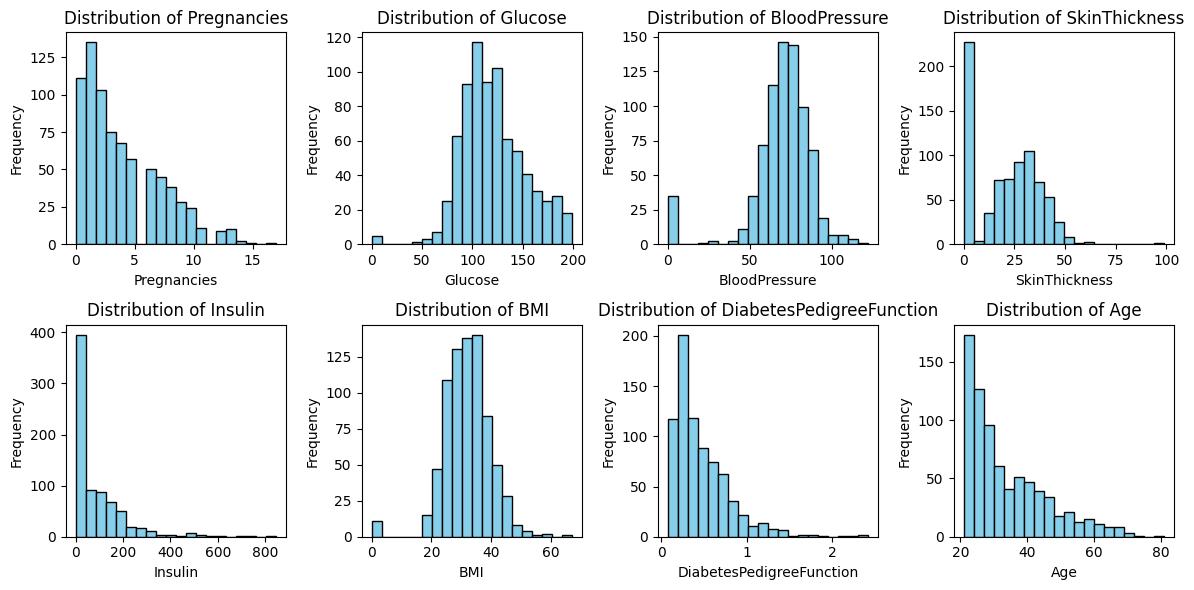

In [12]:
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

axes = axes.flatten()

for i, feature in enumerate(features):

    plt.subplot(num_rows, num_cols, i + 1)
    
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

In [13]:
X = df.iloc[:, :8]
y = df['Outcome']

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=123)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rf_y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_y_pred)
cm_rf = confusion_matrix(y_test, rf_y_pred)

In [21]:
print("Random Forest")
print(classification_report(y_test, rf_y_pred))

Random Forest
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       146
           1       0.80      0.88      0.84       154

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



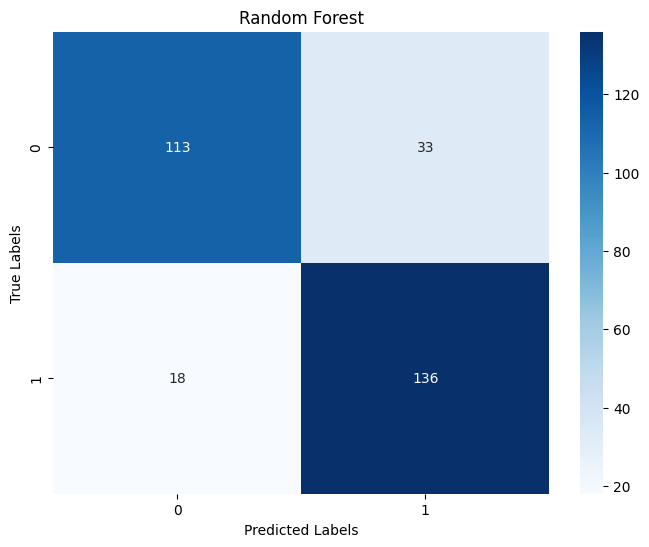

In [22]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest")
plt.show()

In [23]:
print(accuracy_rf)

0.83


In [24]:
from sklearn.model_selection import  GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = GridSearchCV(rf_model, param_grid=param_grid_rf, scoring='accuracy', cv=3, verbose=1)
rf_model.fit(X_train, y_train)

best_params = rf_model.best_params_
rf_model_tuned = RandomForestClassifier(**best_params)
rf_model_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


RandomForestClassifier(max_depth=10)

In [25]:
rf_tuned_y_pred = rf_model_tuned.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, rf_tuned_y_pred)
cm_rf = confusion_matrix(y_test, rf_tuned_y_pred)

In [27]:
print("Random Forest After Fine Tuned")
print(classification_report(y_test, rf_tuned_y_pred))

Random Forest After Fine Tuned
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       146
           1       0.79      0.90      0.84       154

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.83       300
weighted avg       0.83      0.83      0.83       300



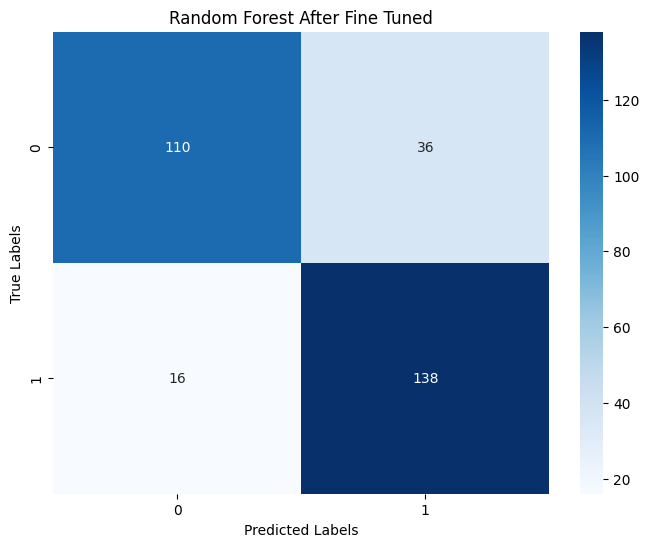

In [28]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest After Fine Tuned")
plt.show()

In [29]:
print(accuracy)

0.8266666666666667
